# Métodos de agrupamiento

En este ejercicio, aplicaremos los conceptos vistos en clase referentes a métodos de agrupamiento no supervisados. Específicamente, explorarás el uso de KMeans y DBScan usando la librería de scikit-learn. En la primera sección analizaremos K-means y en la segunda DBScan


## 1. K-means

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
random_state = 0 # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)
# Podemos establecer los colores con los que se graficará con matplotlib
# utilizando un cmap distinto
matplotlib.rc('image', cmap='nipy_spectral')

    NOTAS PERSONALES

Using colormap cmap='nipy spectral'

model used  KMeans()

'c=mode.labels_' parameter specifies the color of each data point based on the cluster labels assigned by the K-means algorithm. In this way, the scatter plot visually separates data points into clusters by color. 

'model.cluster_centers_' attribute is available after you have trained a K-means model using the .fit() method.
It returns a NumPy array where each row represents a cluster and each column represents a feature dimension.

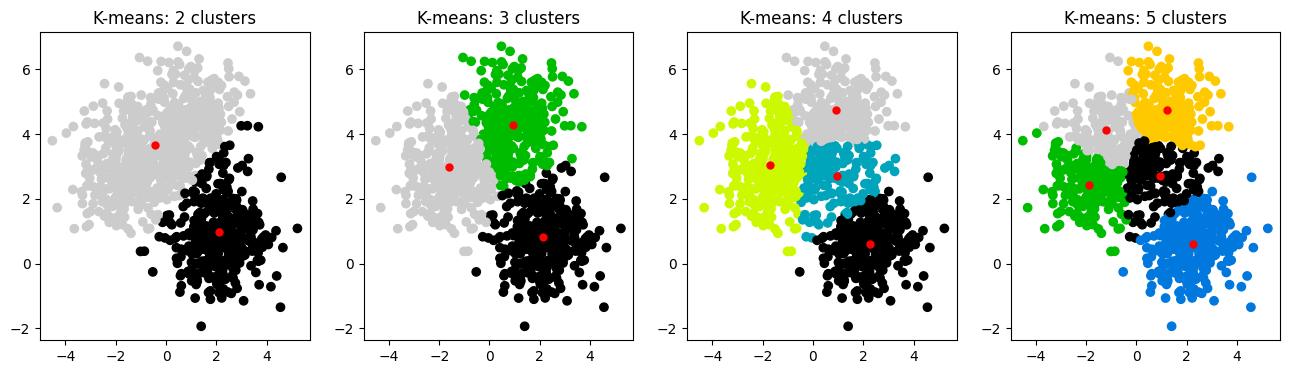

In [84]:
# Generaremos 3 blobs, cada uno con datos iguales. En total habran 1000 puntos distribuidos en estos blobs.
n_samples = 1000
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Utilizaremos el algoritmo de KMeans para encontrar clusters en los datos
n_cols = 4
n_clusters_list = [2, 3, 4, 5]
rows = len(n_clusters_list) // n_cols
fig, axes = plt.subplots(rows, n_cols, figsize=(4*n_cols, 4))
axes = axes.flatten()
for ax, n_clusters in zip(axes, n_clusters_list):
    # TODO: Encuentra los clusters utilizando el algoritmo de KMeans implementado en scikit-learn
    # ====== Start of solution =====
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X)

    # TODO: Grafica los datos usando scatter, recuerda que X = (x, y)
    #X[todos los datos de X] y X[todos los datos de Y]
    #c= perimte seleccionar los colores y usamos el color map de nipy_spectral
    #c=model.labels_ specifica el color de cada label cluster 
    # specifies the color of each data point based on the cluster labels assigned by the K-means algorithm.
    ax.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='nipy_spectral')
    # TODO: Lee la documentación de sklearn para obtener los centroides del modelo entrenado
    # y grafícalos con ax.scatter

    # model.cluster_centers_: regresa un array de NumPy donde cada fila es un cluster y cada columna es una dimension de una caracteristica
    #Este atributo solo esta disponible despues de el entrenamiento de un modelo KMeans.fit()
    centroides = model.cluster_centers_

    ax.scatter(centroides[:, 0], centroides[:, 1], marker='.', s=100, c='red', label='Centroids')

    ax.set_title(f"K-means: {n_clusters} clusters")
plt.show()

En la sección anterior utilizamos 2, 3, 4 y 5 clusters para encontar patrones en los datos y los resultados se graficaron.

TODO: Contesta la siguiente pregunta

- ¿Cúal propuesta de clusters consideras la mejor y porqué?

Parece ser que la segunda opcion donde usamos 3 clusters es la mejor opcion. Es donde se estima visualmente que los clusters tendran una varianza similar.

## 1.2 Definiendo métricas de evaluación

En el algoritmo de K-means debemos seleccionar la cantidad de clusters para poder hacer fit al modelo. Para decidir cuantos clusters utilizar podemos evaluar visualmente o hacer un análisis cuantitativo. 

Una estrategia común para realizar el análisis consiste en entrenar modelos con multiples propuestas de k-grupos y seleccionar la propuesta con el mejor rendimiento. Para ello se debe utilizar una métrica que evalúe el desempeño del algoritmo.

El ["silhouette score"](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) es una métrica muy útil para este objetivo que consiste en medir la distancia intra-grupo e inter-grupo. Esta métrica considera como buen grupo a aquel que tiene una pequeña distancia promedio intra-grupo y que se encuentra muy separado de los demas grupos. Un acomodo con buenos grupos tendrá un silhoute score cercano a 1 y una mala selección de grupos tendrá un score cercano -1. 

En la siguiente sección seguiremos esta estrategia para determinar la mejor cantidad de grupos en los datos provistos.

    NOTAS PERSONALES

Para Silhouette score:

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.


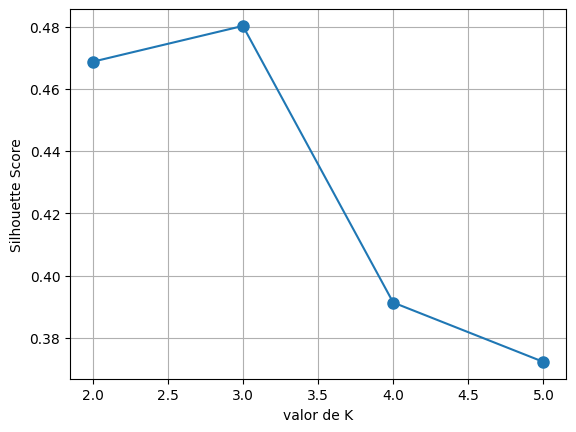

In [85]:
from sklearn.metrics import silhouette_score

Ks = range(2,6)
scores = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # TODO: Obten el silhouete score de nuestro modelo
    # ====== Start of solution =====
    score = silhouette_score(X, kmeans.labels_)
    # ====== End of solution =====
    scores.append(score)

plt.plot(Ks,scores,'-o', markersize=8)
plt.xlabel("valor de K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### TODO: Contesta la siguiente pregunta

De acuerdo al silhouete score
- ¿Qué sería mejor, elegir 4 o 5 clusters?

4 clusters recibe un valor de silhoutte mas alto, por esa razon, es mejor. 

- ¿Cuántos clusters se deberían utilizar para entrenar el algoritmo? ¿Concuerda con tu selección realizada tras visualizar los datos?

3 clusters seria el mas optimo, y si concuerda con la decision de antes. 

## 1.3 Rompiendo las asunciones de K-Means

K-means es un algoritmo que funciona en base a algunas asunciones que pueden no siempre ser ciertas, en esta seccion analizaremos algunos casos en los cuales el K-means puede que no genere la solución esperada.

In [86]:
n_samples=200
# =============================================================================
# Generamos diferentes conjuntos de datos que rompen las asunciones de K-Means
# =============================================================================
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Blobs con varianzas variadas
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Cada dataset es un tuple (datos, etiquetas)
datasets = {"Círculos": noisy_circles,
            "Lunas": noisy_moons, 
            "Blobs": blobs, 
            "Varianzas distintas": varied,
            # "Aleatorio": no_structure,
            "Datos anisotrópicos": aniso}

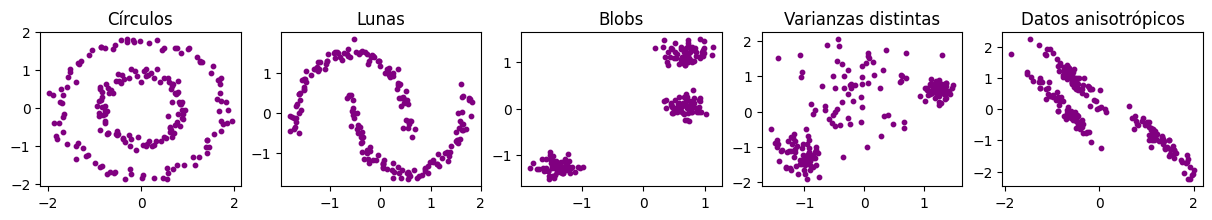

In [87]:
# ============
# Graficamos los datos
# ============
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    # Normalizamos los datos para que todos estén en la misma escala
    X = StandardScaler().fit_transform(X)
    # TODO: Grafica los datos usando scatter
    # ====== Start of solution =====
    ax.scatter(X[:,0], X[:,1], c='purple', marker='o', s=10)
    # ====== End of solution =====
    ax.set_title(name)    

### Para los conjuntos de datos anteriores...
Aplica K-means a cada uno de los datasets anteriores. Determina los hiperparámetros (k) que resulten en la mejor asignación según tu criterio para cada grupo.
- ¿En que conjunto/os esperas que k-means realice una solución adecuada?

De los datasets anteriores el de Blobs parece ser el mas adecuado. 

- ¿Cuales son las asunciones de k-means?

k-means supone que la varianza de cada variable es esférica;

todas las variables tienen la misma varianza;

la probabilidad previa para todos los k grupos es la misma, es decir, cada grupo tiene aproximadamente el mismo número de observaciones;

- ¿Cual de estos conjuntos NO rompe las asunciones de k-means?

Blobs es el unico conjunto de datos que NO rompe las asunciones. 

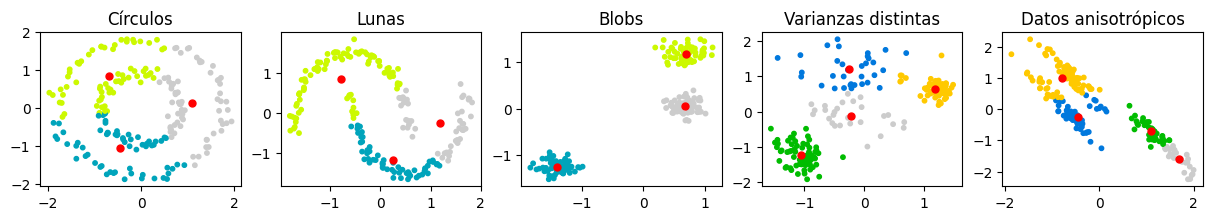

In [88]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()


# TODO: Modifica la cantidad de clusters para cada dataset hasta que encuentres un resultado que te satisfaga
n_clusters = {"Círculos": 3,
              "Lunas": 3,
              "Blobs": 3,
              "Varianzas distintas": 4,
              "Anisotrópicos": 4}
for (name, data), n, ax in zip(datasets.items(), n_clusters.values(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    # TODO: Aplica K-means para encontrar los grupos y los centros de cada cluster
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====
    kmeans = KMeans(n_clusters=n, random_state=random_state)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    # ====== End of solution =====
    
    ax.scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_, vmin=-1)
    ax.scatter(centers[:, 0], centers[:, 1], marker=".", s=100, c='red')


 ## **<font color=D1A7F2>Usando Silhouette Score en K Means</font>**

    Metodo alterno: usaremos Silhouette Score para encontrar la mejor cantidad de clusters para cado conjunto de datos

En el codigo anterior aplicamos los numeros de clusters visualmente. 

En la siguiente seccion usaremos diferentes rangos de clusters para cada conjunto de datos y aplicaremos el que nos de el mejor valor de Silhouette Score respectivamente.

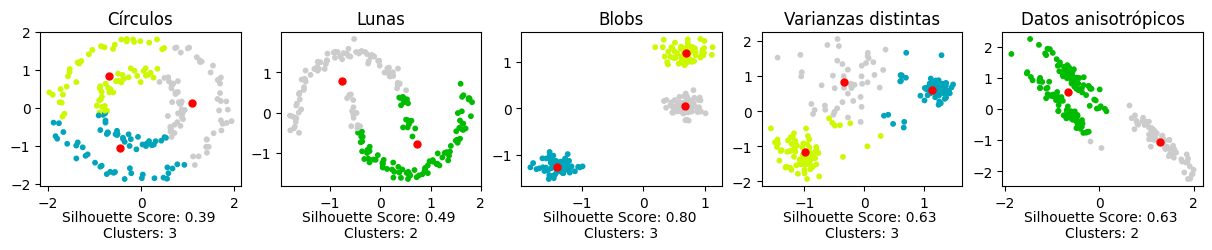

In [89]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2))
axs = axs.flatten()

for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    
    # Empezamos con los valores de Silhouette mas bajos posibles y la cantidad de clusters menores posibles
    best_score = -1
    best_num_clusters = 2
    best_kmeans = None
    
    # Haremos iteraciones de 2 a 7 para la cantidad de clusters
    for n in range(2, 7):
        kmeans = KMeans(n_clusters=n, random_state=random_state)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
    
        
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_num_clusters = n
            best_kmeans = kmeans
    
    ax.text(0.5, -0.2, f"\nSilhouette Score: {best_score:.2f} \nClusters: {best_num_clusters}", 
            transform=ax.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='center')
    
    # Graficar con mejor cantidad de clusters y el valor de Silhouette Score
    centers = best_kmeans.cluster_centers_
    ax.scatter(X[:, 0], X[:, 1], s=10, c=best_kmeans.labels_, vmin=-1)
    ax.scatter(centers[:, 0], centers[:, 1], marker=".", s=100, c='red')

## 2. DBScan
DBScan es otro método de agrupamiento el cual encuentra grupos que funciona a través de densidad local.
En las siguientes celdas, aplica DBScan a cada uno de los datasets anteriores y compara los resultados con los de K-Means. Ajusta los hiperparámetros según tu criterio para lograr un agrupamiento adecuado.

    NOTAS PERSONALES (sklearn.cluster.DBSCAN)

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

The worst case memory complexity of DBSCAN is O(n^2), which can occur when the **eps** param is large and **min_samples** is low. 


**<font color=A7F2A9>epsfloat, default=0.5</font>**

The **maximum distance** between two samples for one to be considered as in the neighborhood of the other. 
Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm

**<font color=A7F2A9>min_samplesint, default=5</font>**

The **number of samples** (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.

 ## **<font color=D1A7F2>NOTAS DE LOS PIMPOLLOS</font>**

En la seccion anterior observamos como obtener la cantidad de clusters adecuada usando Silhouette Score. 

Usaremos esa informacion para clasificar los clusters en DBScan.

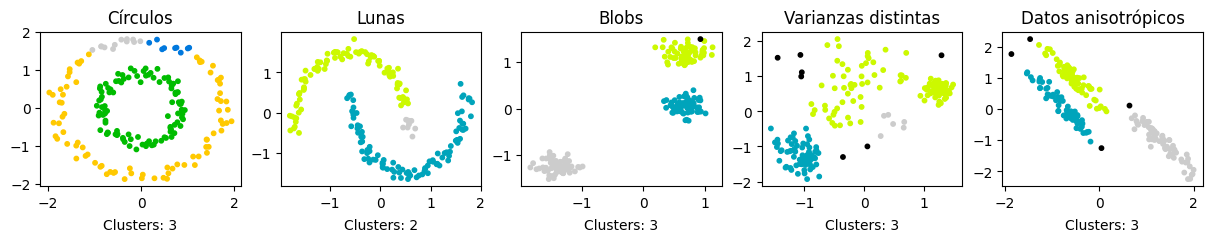

In [90]:
# DBScan
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica los hiper parámetros de dbscan hasta encontrar un resultado que te satisfaga
params = {"Círculos": {"eps": 0.3, "min_samples": 4},
          "Lunas": {"eps": 0.34, "min_samples": 3},
          "Blobs": {"eps": 0.18, "min_samples": 4},
          "Varianzas distintas": {"eps": 0.42, "min_samples": 4},
          "Datos anisotrópicos": {"eps": 0.3, "min_samples": 5}}
for ((name, data), ax) in zip(datasets.items(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    eps = params[name]['eps']
    min_samples = params[name]['min_samples']
    # TODO: Aplica DBSCAN para encontrar los clusters
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    grupos = dbscan.fit_predict(X)
    # ====== End of solution =====
    num_clusters = len(np.unique(grupos)) - 1  # restamos 1 para ignorar datos ruidosos

    ax.text(0.5, -0.2, f"\nClusters: {num_clusters}", 
            transform=ax.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='center')
    
    ax.scatter(X[:, 0], X[:, 1], s=10, c=grupos, vmin=-1)
    
plt.show()

### TODO: Contesta la siguientes preguntas
- ¿Qué diferencia encuentras entre los clusters encontrados con DBSCAN y los clusters encontrados con K-Means?

Los clusters encontrados a travez de DBSCAN son mejores para conjunto de datos en cuales los clusters no estan claramente divididos con lineas rectas. Por ejemplo en el dataset de 'Circulos' es mas optimo usar DBSCAN que K-Means.

- ¿Qué metodo clasifica mejor los clusters de Lunas y a qué crees que se deba?

DBSCAN clasifica los clusters de Lunas mejor ya que no esta limitado por el comportamiento (figura circular) de los datos.

- ¿Qué son los puntos negros encontrados con DBSCAN?

Outliers. Puntos los cuales quedan muy lejos para ser parte de un cluster. 

- ¿En qué casos crees que sea recomendable utilizar K-means sobre DBSCAN?

K Means es mejor para conjunto de datos muy grandes ya que es mas eficiente. 

- En base a tu experiencia ¿que desventajas notas para DBScan contra K-means?

DBSCAN parece ser menos eficiente, ocupa mas informacion del usuario para poder ser mas preciso y correcto con los agrupamientos.

- En base a tu experiencia ¿que ventajas notas para DBScan contra K-means?

DBScan es mejor para conjunto de datos en los cuales el comportamiento (figura) no se muy claramento divididos.

- Si entrenamos DBSCAN y queremos buscar un grupo al que pertenezca un punto nuevo, ¿Existe alguna función de sk-learn que nos permita hacer esto?¿Cómo podríamos predecir el grupo al que pertenece un nuevo datapoint?

Usando el metodo de **predict** podemos asignar un valor nuevo un cluster designado.